# Global Terrorism Classification
by : Hesham Asem

________________

here we have a dataset for ens of thousands of successful & failed terroristic operations worldwide , & we need to build a classifier , which can expect whether the operation will succeeded or failed 

Database : 
https://www.kaggle.com/START-UMD/gtd/

so let's import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

then we'll read the data

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv' ,encoding= 'ISO-8859-1')  
print(f'Data Shape is {data.shape}')
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Shape is (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


____

now it's time to define needed functions


In [3]:
def drop(feature) :
    global data
    data.drop([feature],axis=1, inplace=True)
    data.head()

def unique(feature) : 
    global data
    print(f'Number of unique vaure are {len(list(data[feature].unique()))} which are : \n {list(data[feature].unique())}')

def unique_all(show_value = True) : 
    global data
    for col in data.columns : 
        print(f'Length of unique data for   {col}   is    {len(data[col].unique())} ')
        if show_value == True  : 
            print(f'unique values ae {data[col].unique()}' )
            print('-----------------------------')

def drop_nulls(percentage = 0.3) : 
    global data
    for col in data.columns : 
        ratio =  data[col].isna().sum()/data.shape[0]
        if ratio >= percentage : 
            data.drop([col],axis=1, inplace=True)
            print(f'Column {col} has been dropped since nulls percentage is {round(ratio *100)} %')

def count_nulls() : 
    global data
    for col in data.columns : 
        if not data[col].isna().sum() == 0 : 
            print(f'Column {col} has been number of nulls {data[col].isna().sum()}')


def fillna(feature , val = 'none') : 
    global data
    data[feature].fillna(val, inplace=True)

def cplot(feature) : 
    global data
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

def spie(series) : 
    global data
    plt.pie(series.values,labels=list(series.index),autopct ='%1.2f%%',labeldistance = 1.1,explode = [0.05 for i in range(len(series.values))])
    plt.show()

def pie(feature) : 
    global data
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

def make_xy(feature) : 
    global data
    X = data.drop([feature], axis=1, inplace=False)
    y = data[feature]
    return X , y
   
def encoder(feature , new_feature, drop = True) : 
    global data
    enc  = LabelEncoder()
    enc.fit(data[feature])
    data[new_feature] = enc.transform(data[feature])
    if drop == True : 
        data.drop([feature],axis=1, inplace=True)
    
def max_counts(feature, number, return_rest = False) : 
    global data
    counts = data[feature].value_counts()
    values_list = list(counts[:number].values)
    rest_value =  sum(counts.values) - sum (values_list)
    index_list = list(counts[:number].index)

    if return_rest : 
        values_list.append(rest_value )
        index_list.append('rest items')

    result = pd.Series(values_list, index=index_list)

    if len(data[feature]) <= number : 
        result = None
    return result

def remove_zero(feature , val = 0) :
    global data
    data = data[data[feature] != val]
    
def show_details() : 
    global data
    for col in data.columns : 
        print(f'for feature : {col}')
        print(f'Number of Nulls is   {data[col].isna().sum()}')
        print(f'Number of Unique values is   {len(data[col].unique())}')
        print(f'random Value {data[col][0]}')
        print(f'random Value {data[col][10]}')
        print(f'random Value {data[col][20]}')
        print('--------------------------')


____

# Data Cleaning

now let's know the data shape

In [4]:
data.shape

(181691, 135)

ok , 135 features ,  but since several features got so much nulls , so it will mislead us in the training . 

so let's drop all features with null value covers more than 30% of all rows 

In [5]:
drop_nulls()

Column approxdate has been dropped since nulls percentage is 95.0 %
Column resolution has been dropped since nulls percentage is 99.0 %
Column location has been dropped since nulls percentage is 69.0 %
Column summary has been dropped since nulls percentage is 36.0 %
Column alternative has been dropped since nulls percentage is 84.0 %
Column alternative_txt has been dropped since nulls percentage is 84.0 %
Column attacktype2 has been dropped since nulls percentage is 97.0 %
Column attacktype2_txt has been dropped since nulls percentage is 97.0 %
Column attacktype3 has been dropped since nulls percentage is 100.0 %
Column attacktype3_txt has been dropped since nulls percentage is 100.0 %
Column targtype2 has been dropped since nulls percentage is 94.0 %
Column targtype2_txt has been dropped since nulls percentage is 94.0 %
Column targsubtype2 has been dropped since nulls percentage is 94.0 %
Column targsubtype2_txt has been dropped since nulls percentage is 94.0 %
Column corp2 has been d

_____

now what is the shape  ? 

In [6]:
data.shape

(181691, 48)

almost 100 feature are dropped . 

now we'll drop ventid feature since it is not helpful , & also several numerical features which got exact values as text like country & region 



In [7]:
drop('eventid')
drop('country')
drop('region')
drop('attacktype1')
drop('targtype1')
drop('targsubtype1')
drop('natlty1')
drop('weaptype1')
drop('weapsubtype1')

now how it looks 

In [8]:
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


_____

now let's have a look to unique values for each feature 

In [9]:
unique_all(False)

Length of unique data for   iyear   is    47 
Length of unique data for   imonth   is    13 
Length of unique data for   iday   is    32 
Length of unique data for   extended   is    2 
Length of unique data for   country_txt   is    205 
Length of unique data for   region_txt   is    12 
Length of unique data for   provstate   is    2856 
Length of unique data for   city   is    36675 
Length of unique data for   latitude   is    48323 
Length of unique data for   longitude   is    48040 
Length of unique data for   specificity   is    6 
Length of unique data for   vicinity   is    3 
Length of unique data for   crit1   is    2 
Length of unique data for   crit2   is    2 
Length of unique data for   crit3   is    2 
Length of unique data for   doubtterr   is    4 
Length of unique data for   multiple   is    3 
Length of unique data for   success   is    2 
Length of unique data for   suicide   is    2 
Length of unique data for   attacktype1_txt   is    9 
Length of unique data for

& how many nulls are there  ? 

In [10]:
count_nulls()

Column provstate has been number of nulls 421
Column city has been number of nulls 434
Column latitude has been number of nulls 4556
Column longitude has been number of nulls 4557
Column specificity has been number of nulls 6
Column doubtterr has been number of nulls 1
Column multiple has been number of nulls 1
Column targsubtype1_txt has been number of nulls 10373
Column corp1 has been number of nulls 42550
Column target1 has been number of nulls 636
Column natlty1_txt has been number of nulls 1559
Column guncertain1 has been number of nulls 380
Column weapsubtype1_txt has been number of nulls 20768
Column nkill has been number of nulls 10313
Column nwound has been number of nulls 16311
Column ishostkid has been number of nulls 178


also we need to have a detailed look so all data 

In [11]:
show_details()

for feature : iyear
Number of Nulls is   0
Number of Unique values is   47
random Value 1970
random Value 1970
random Value 1970
--------------------------
for feature : imonth
Number of Nulls is   0
Number of Unique values is   13
random Value 7
random Value 1
random Value 1
--------------------------
for feature : iday
Number of Nulls is   0
Number of Unique values is   32
random Value 2
random Value 1
random Value 14
--------------------------
for feature : extended
Number of Nulls is   0
Number of Unique values is   2
random Value 0
random Value 0
random Value 0
--------------------------
for feature : country_txt
Number of Nulls is   0
Number of Unique values is   205
random Value Dominican Republic
random Value United States
random Value United States
--------------------------
for feature : region_txt
Number of Nulls is   0
Number of Unique values is   12
random Value Central America & Caribbean
random Value North America
random Value North America
--------------------------
for

_____

so we'll need to handle Numerical features & categorical features , step by step

_____

# Numerical Features


we have 14 numerical features to handle here which are : iyear , imonth , iday , extended , latitude , longitude , specificity , vicinity , doubtterr , multiple , guncertain1, nkill , nwound & ishostkid

let's be sure that it got no nulls & all values are suitable

let's start with iyear

In [12]:
unique('iyear')

Number of unique vaure are 47 which are : 
 [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


ok looks fine , let's draw a graphical representaion for year distribution 

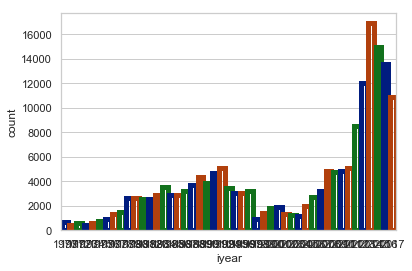

In [13]:
cplot('iyear')

looks that the rate increased so much in the last fea years , how about the month

In [14]:
unique('imonth')

Number of unique vaure are 13 which are : 
 [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]


since value of 0 is not accepted in month , we have to drop all rows contain 0 in month value , how many are rows right now ? 


In [15]:
data.shape[0]

181691

now let's drop 0 value at month

In [16]:
remove_zero('imonth')

now check number of rows 

In [17]:
data.shape[0]

181671

about 20 rows dropped , let's be sure that 0 value is vanished

In [18]:
unique('imonth')

Number of unique vaure are 12 which are : 
 [7, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]


is there specific month which got more terroristic operation rate ? 

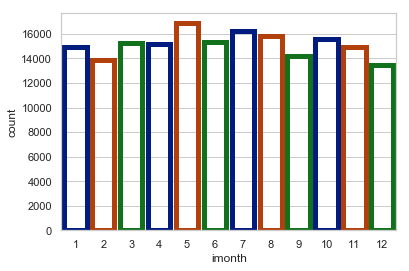

In [19]:
cplot('imonth')

almost equally distributed 

now how about the days ? 

In [20]:
unique('iday')

Number of unique vaure are 32 which are : 
 [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]


again we have to drop all values of 0 

In [21]:
remove_zero('iday')

now how it looks 

In [22]:
unique('iday')

Number of unique vaure are 31 which are : 
 [2, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]


& how many rows left

In [23]:
data.shape[0]

180800

almost 1 thousand rows dropped

______

ok , let's moce to extended

In [24]:
unique('extended')

Number of unique vaure are 2 which are : 
 [0, 1]


nothing wrong with it , how about latitude , how many nulls at it  ?

In [25]:
data['latitude'].isna().sum()

4469

so much nulls , so let's fill nulls with 0 then drop all rows with zero value 

In [26]:
fillna('latitude',0)
remove_zero('latitude')

now it should got no nulls

In [27]:
data['latitude'].isna().sum()

0

great , how many rows dropped ? 

In [28]:
data.shape[0]

176331

great , let's repeat it with longitude

In [29]:
fillna('longitude',0)
remove_zero('longitude')
data['longitude'].isna().sum()

0

now hw many rows left

In [30]:
data.shape[0]

176330

______

let's move to specificity 

In [31]:
data['specificity'].isna().sum()

0

cool , how about vicinity

In [32]:
data['vicinity'].isna().sum()

0

and doubtterr

In [33]:
data['doubtterr'].isna().sum()

1

what are unique values for it ? 

In [34]:
unique('doubtterr')

Number of unique vaure are 4 which are : 
 [0.0, 1.0, -9.0, nan]


so since it got an original values for 0 , so we'll fill nulls with another number 33 to drop it

In [35]:
fillna('doubtterr',33)
remove_zero('doubtterr',33)
data['doubtterr'].isna().sum()

0

great , now how multiple looks  ? 

In [36]:
data['multiple'].isna().sum()

1

what are values at it ? 

In [37]:
unique('multiple')

Number of unique vaure are 3 which are : 
 [0.0, 1.0, nan]


again we'll fill nulls with 33 to drop it

In [38]:
fillna('multiple',33)
remove_zero('multiple',33)
data['multiple'].isna().sum()

0

_____

now let's move to gun certain

In [39]:
data['guncertain1'].isna().sum()

371

what are the values ? 

In [40]:
unique('guncertain1')

Number of unique vaure are 3 which are : 
 [0.0, 1.0, nan]


we'll repeat the 33 value again 

In [41]:
fillna('guncertain1',33)
remove_zero('guncertain1',33)
data['guncertain1'].isna().sum()

0

also we can have a look to their ratios

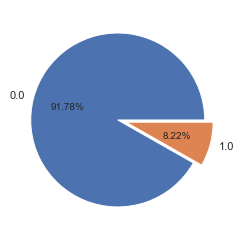

In [42]:
pie('guncertain1')

____

now the number of victims

In [43]:
unique('nkill')

Number of unique vaure are 202 which are : 
 [1.0, 0.0, nan, 7.0, 47.0, 2.0, 5.0, 3.0, 4.0, 25.0, 15.0, 8.0, 26.0, 81.0, 6.0, 9.0, 16.0, 30.0, 31.0, 12.0, 21.0, 14.0, 88.0, 11.0, 10.0, 27.0, 18.0, 22.0, 19.0, 92.0, 13.0, 73.0, 100.0, 42.0, 17.0, 98.0, 422.0, 48.0, 34.0, 54.0, 50.0, 20.0, 41.0, 37.0, 28.0, 40.0, 32.0, 85.0, 23.0, 300.0, 35.0, 60.0, 24.0, 58.0, 87.0, 45.0, 38.0, 29.0, 36.0, 74.0, 83.0, 90.0, 70.0, 66.0, 80.0, 67.0, 51.0, 39.0, 114.0, 124.0, 76.0, 33.0, 75.0, 57.0, 62.0, 46.0, 56.0, 63.0, 120.0, 102.0, 79.0, 52.0, 77.0, 49.0, 111.0, 165.0, 241.0, 108.0, 132.0, 65.0, 43.0, 228.0, 110.0, 180.0, 250.0, 93.0, 200.0, 130.0, 59.0, 94.0, 146.0, 329.0, 44.0, 97.0, 240.0, 227.0, 126.0, 106.0, 388.0, 68.0, 270.0, 84.0, 53.0, 82.0, 171.0, 107.0, 55.0, 112.0, 72.0, 96.0, 140.0, 61.0, 105.0, 115.0, 1180.0, 170.0, 168.0, 121.0, 375.0, 64.0, 91.0, 123.0, 135.0, 256.0, 109.0, 271.0, 206.0, 104.0, 320.0, 224.0, 118.0, 150.0, 129.0, 95.0, 1384.0, 1383.0, 190.0, 119.0, 78.0, 101.0, 71.0, 11

again it contain several numbers & we cannot use 0 since it's exist indeed , let's pick 999999

In [44]:
fillna('nkill',999999)
remove_zero('nkill',999999)
data['nkill'].isna().sum()

0

so we can have a look to umber of victims distribution 

In [45]:
victims = max_counts('nkill',10, True)
victims

0.0           85666
1.0           35735
2.0           13780
3.0            7477
4.0            4784
5.0            3401
6.0            2439
7.0            1876
8.0            1432
10.0           1134
rest items     8605
dtype: int64

also we can draw a pie chart for it

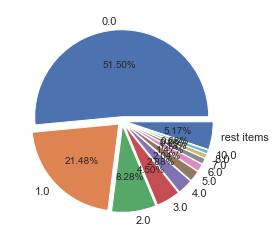

In [46]:
spie(victims)

almost half of operations with no victims & fifth with only 1 victim , now how about the wounds

In [47]:
data['nwound'].isna().sum()

6410

how about unique values ? 

In [48]:
unique('nwound')

Number of unique vaure are 239 which are : 
 [0.0, 1.0, 2.0, nan, 7.0, 9.0, 17.0, 5.0, 3.0, 10.0, 12.0, 20.0, 4.0, 11.0, 27.0, 13.0, 19.0, 130.0, 56.0, 24.0, 6.0, 72.0, 238.0, 55.0, 15.0, 8.0, 18.0, 50.0, 34.0, 14.0, 70.0, 102.0, 41.0, 48.0, 36.0, 25.0, 81.0, 54.0, 53.0, 100.0, 45.0, 40.0, 62.0, 74.0, 22.0, 31.0, 16.0, 30.0, 285.0, 23.0, 42.0, 43.0, 76.0, 44.0, 52.0, 46.0, 49.0, 160.0, 37.0, 21.0, 60.0, 26.0, 33.0, 28.0, 39.0, 38.0, 35.0, 32.0, 78.0, 80.0, 47.0, 188.0, 215.0, 85.0, 75.0, 161.0, 90.0, 300.0, 95.0, 135.0, 61.0, 138.0, 71.0, 700.0, 66.0, 136.0, 120.0, 217.0, 319.0, 133.0, 68.0, 73.0, 29.0, 751.0, 200.0, 112.0, 250.0, 82.0, 132.0, 230.0, 107.0, 114.0, 84.0, 140.0, 150.0, 51.0, 58.0, 64.0, 295.0, 106.0, 125.0, 69.0, 59.0, 57.0, 122.0, 109.0, 88.0, 115.0, 176.0, 220.0, 97.0, 65.0, 800.0, 173.0, 92.0, 500.0, 236.0, 98.0, 286.0, 141.0, 5500.0, 650.0, 671.0, 86.0, 104.0, 83.0, 101.0, 1272.0, 105.0, 386.0, 391.0, 110.0, 149.0, 89.0, 91.0, 119.0, 77.0, 118.0, 67.0, 170.0, 194.0, 

again we'll use 999999to drop null rows

In [49]:
fillna('nwound',999999)
remove_zero('nwound',999999)
data['nwound'].isna().sum()

0

let's have a look to number of wounded people statistics

In [50]:
wounded = max_counts('nwound',10, True)
wounded

0.0           99438
1.0           15515
2.0            9960
3.0            7131
4.0            4755
5.0            3719
6.0            2805
7.0            2388
8.0            1780
10.0           1338
rest items    11090
dtype: int64

how it looks

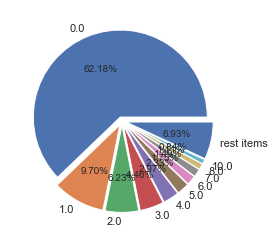

In [51]:
spie(wounded)

ok , now to the last numerical feature 

In [52]:
data['ishostkid'].isna().sum()

153

unique values ? 

In [53]:
unique('ishostkid')

Number of unique vaure are 4 which are : 
 [0.0, 1.0, nan, -9.0]


so let's use 33 value

In [54]:
fillna('ishostkid',33)
remove_zero('ishostkid',33)
data['ishostkid'].isna().sum()

0

great , now we read to move to categorical features 

______

# Categorical Features

how the data looks now ? 

In [55]:
data.shape

(159766, 39)

how many nulls ? 

In [56]:
count_nulls()

Column provstate has been number of nulls 377
Column city has been number of nulls 422
Column targsubtype1_txt has been number of nulls 9478
Column corp1 has been number of nulls 34712
Column target1 has been number of nulls 525
Column natlty1_txt has been number of nulls 1445
Column weapsubtype1_txt has been number of nulls 16078


snce we have hundreds of nulls in these 7 features , let's fill them with 'other' to make them ready for label encoder

In [57]:
fillna('provstate','other')
fillna('city','other')
fillna('targsubtype1_txt','other')
fillna('corp1','other')
fillna('target1','other')
fillna('natlty1_txt','other')
fillna('weapsubtype1_txt','other')

now it should show 0 nulls in all features  

In [58]:
count_nulls()

great now we can label encode all categorical features , & drop original features 

In [59]:
encoder('provstate','provstate_code',True)
encoder('city','city_code',True)
encoder('targsubtype1_txt','targsubtype_code',True)
encoder('corp1','corp_code',True)
encoder('target1','target_code',True)
encoder('natlty1_txt','natlty_code',True)
encoder('weapsubtype1_txt','weapsubtype_code',True)

encoder('country_txt','country_code',True)    
encoder('region_txt','region_code',True)    
encoder('attacktype1_txt','attacktype_code',True)    
encoder('targtype1_txt','targtype_code',True)    
encoder('gname','gname_code',True)    
encoder('weaptype1_txt','weaptype_code',True)    
encoder('dbsource','dbsource_code',True)    

now how data looks like

In [60]:
show_details()

for feature : iyear
Number of Nulls is   0
Number of Unique values is   47
random Value 1970
random Value 1970
random Value 1970
--------------------------
for feature : imonth
Number of Nulls is   0
Number of Unique values is   12
random Value 7
random Value 1
random Value 1
--------------------------
for feature : iday
Number of Nulls is   0
Number of Unique values is   31
random Value 2
random Value 1
random Value 14
--------------------------
for feature : extended
Number of Nulls is   0
Number of Unique values is   2
random Value 0
random Value 0
random Value 0
--------------------------
for feature : latitude
Number of Nulls is   0
Number of Unique values is   44468
random Value 18.456792
random Value 43.4685
random Value 40.116748
--------------------------
for feature : longitude
Number of Nulls is   0
Number of Unique values is   44191
random Value -69.951164
random Value -89.744299
random Value -88.23926999999999
--------------------------
for feature : specificity
Number of 

In [61]:
data.head()

,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,crit2,...,target_code,natlty_code,weapsubtype_code,country_code,region_code,attacktype_code,targtype_code,gname_code,weaptype_code,dbsource_code
0,1970,7,2,0,18.456792,-69.951164,1.0,0,1,1,...,35441,49,30,45,1,1,13,1774,10,13
5,1970,1,1,0,37.005105,-89.176269,1.0,0,1,1,...,13988,197,27,186,6,0,12,639,4,8
6,1970,1,2,0,-34.891151,-56.187214,1.0,0,1,1,...,35251,198,1,187,7,1,12,3048,4,13
7,1970,1,2,0,37.791927,-122.225906,1.0,0,1,1,...,23515,197,26,186,6,2,20,3163,2,8
8,1970,1,2,0,43.076592,-89.412488,1.0,0,1,1,...,50337,197,12,186,6,3,9,2117,5,8


and it should show no nulls

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159766 entries, 0 to 181690
Data columns (total 39 columns):
iyear               159766 non-null int64
imonth              159766 non-null int64
iday                159766 non-null int64
extended            159766 non-null int64
latitude            159766 non-null float64
longitude           159766 non-null float64
specificity         159766 non-null float64
vicinity            159766 non-null int64
crit1               159766 non-null int64
crit2               159766 non-null int64
crit3               159766 non-null int64
doubtterr           159766 non-null float64
multiple            159766 non-null float64
success             159766 non-null int64
suicide             159766 non-null int64
guncertain1         159766 non-null float64
individual          159766 non-null int64
nkill               159766 non-null float64
nwound              159766 non-null float64
property            159766 non-null int64
ishostkid           159766 non-nu

____

now data is ready to split & build the model 

# Data Splitting




In [63]:
X , y = make_xy('success')

how about the shape

In [64]:
X.shape

(159766, 38)

In [65]:
y.shape

(159766,)

then split it 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (119824, 38)
X_test shape is  (39942, 38)
y_train shape is  (119824,)
y_test shape is  (39942,)


and we can see the count plot of the output

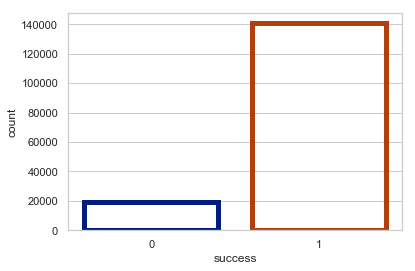

In [67]:
cplot('success')

almost 10% of operations failed & 90% succeeded

______

# Building the Model

let's use the Gradient Boosting Classifier , with 100 classifier & max_depth 3

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=33,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

now how the scores looks like

In [69]:
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9472392842836159
GBCModel Test Score is :  0.9455460417605528


great ,  94% accuracy ,  lets predict the X_test

In [70]:
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
print('Predicted Value for GBCModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

Predicted Value for GBCModel is :  [0 1 1 1 1 1 1 1 1 0]
Prediction Probabilities Value for GBCModel is :  [[0.53389237 0.46610763]
 [0.01341194 0.98658806]
 [0.013064   0.986936  ]
 [0.04913287 0.95086713]
 [0.03383446 0.96616554]
 [0.26060571 0.73939429]
 [0.07396851 0.92603149]
 [0.04155095 0.95844905]
 [0.05149775 0.94850225]
 [0.89478621 0.10521379]]
